In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neighbors import KNeighborsClassifier

In [2]:
output_path = "../suzuki16/output_norm/"
params_path = "../suzuki16/param_list.dat"

names = ["name", "t0", "tE", "u0", "t_in", "t_out"]
dtype = ["U20", float, float, float, float, float]
params = np.genfromtxt(params_path, dtype=dtype, names=names)

array_paths = []
for i in range(params.shape[0]):
    array_paths.append(output_path+params["name"][i]+".npy")

In [3]:
i = 18
chi2_array = np.load(array_paths[i])
condition = chi2_array["chi2_flat"] > 3
chi2_array = chi2_array[np.where(condition)]
print(params["name"][i])

anom_cond1 = chi2_array["t0"]+3*chi2_array["teff"]>params["t_in"][i]
anom_cond2 = chi2_array["t0"]-3*chi2_array["teff"]<params["t_out"][i]

anom_ind = np.where(anom_cond1&anom_cond2)
flat_chi2_max = np.max(chi2_array["chi2_flat"][anom_ind])
zero_chi2_max = np.max(chi2_array["chi2_zero"][anom_ind])
print(flat_chi2_max)

base_cond1 = chi2_array["t0"]+3*chi2_array["teff"]<params["t_in"][i]
base_cond2 = chi2_array["t0"]-3*chi2_array["teff"]>params["t_out"][i]
base_ind = np.where(base_cond1 | base_cond2)
print(np.max(chi2_array["chi2_flat"][base_ind]))

MB12288
1702.2064552698112
1208.4621139455767


In [4]:
t0_width = 35
selected_ind = []
for t in range(int(np.min(chi2_array["t0"])), int(np.max(chi2_array["t0"])) + 1, t0_width):
    ind = np.where((chi2_array["t0"] >= t) & (chi2_array["t0"] < t + t0_width))
    if len(ind[0]) > 0:
        max_chi2_ind = ind[0][np.argmax(chi2_array["chi2_flat"][ind])]
        selected_ind.append(max_chi2_ind)
        
selected_ind = np.array(selected_ind)
selected_anom_ind = np.intersect1d(selected_ind,anom_ind)
selected_base_ind = np.intersect1d(selected_ind,base_ind)

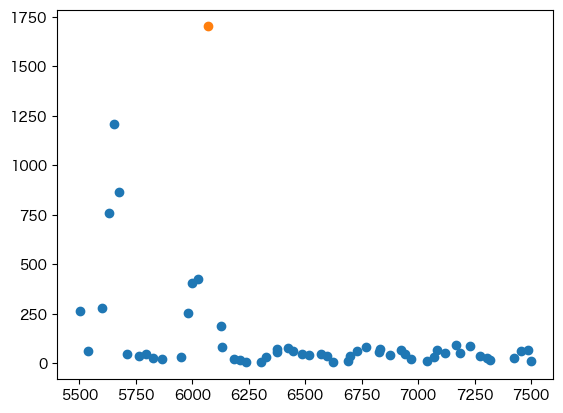

In [5]:
plt.scatter(chi2_array["t0"][selected_base_ind],chi2_array["chi2_flat"][selected_base_ind])
plt.scatter(chi2_array["t0"][selected_anom_ind],chi2_array["chi2_flat"][selected_anom_ind])

plt.show()

In [6]:
lof = LocalOutlierFactor(n_neighbors=10, contamination=1/chi2_array.shape[0])

X = np.column_stack((chi2_array["chi2_flat"][selected_ind], chi2_array["chi2_zero"][selected_ind]))

y_pred = lof.fit_predict(X)
y_pred = lof.fit_predict(chi2_array["chi2_flat"][selected_ind].reshape(-1,1))

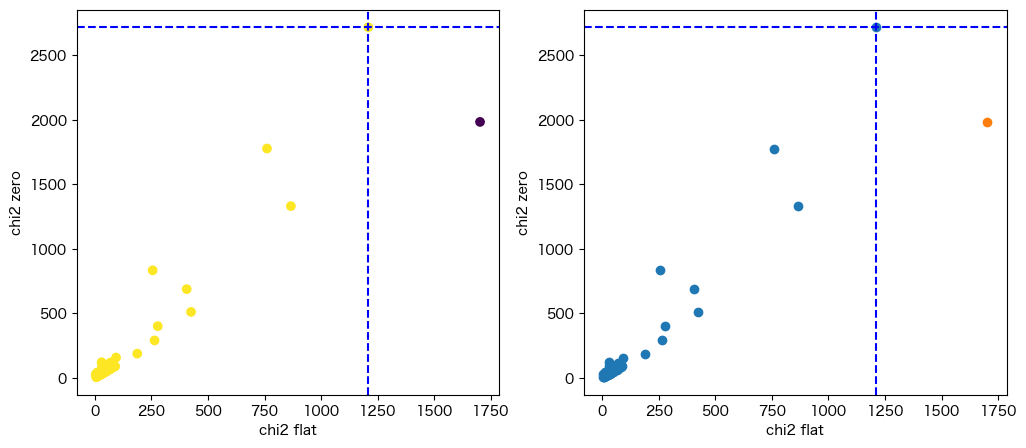

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,5))

ax1.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis')
ax1.axvline(x=np.max(chi2_array["chi2_flat"][selected_base_ind]), color='b', linestyle='--')
ax1.axhline(y=np.max(chi2_array["chi2_zero"][selected_base_ind]), color='b', linestyle='--')
ax1.set_xlabel("chi2 flat")
ax1.set_ylabel("chi2 zero")

ax2.scatter(chi2_array["chi2_flat"][selected_base_ind], chi2_array["chi2_zero"][selected_base_ind], c="C0")
ax2.scatter(chi2_array["chi2_flat"][selected_anom_ind], chi2_array["chi2_zero"][selected_anom_ind], c="C1")
ax2.axvline(x=np.max(chi2_array["chi2_flat"][selected_base_ind]), color='b', linestyle='--')
ax2.axhline(y=np.max(chi2_array["chi2_zero"][selected_base_ind]), color='b', linestyle='--')
ax2.set_xlabel("chi2 flat")
ax2.set_ylabel("chi2 zero")

plt.show()

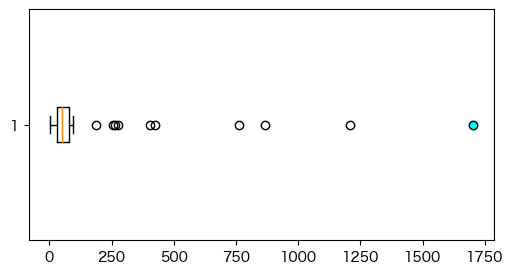

In [8]:
plt.figure(figsize=(6, 3))
plt.boxplot(chi2_array["chi2_flat"][selected_ind],vert=False)
plt.scatter(chi2_array["chi2_flat"][selected_anom_ind],np.ones(selected_anom_ind.shape[0]),c="cyan")

plt.show()